# Reinforcement Learning Homework 1

Xin Qian

Some assumptions before we start:
 - The cost of waiting customers is calculated after dispatched shuttle (if available).
 - Suppose we are approaching the limit of number of customers, for example we have 97 customers now and the limit is 100. Then the expceted value of cost is $\frac{V(98) + V(99) + V(100) + V(100) + V(100)}{5}$, but not $\frac{V(98) + V(99) + V(100)}{3}$.
 - For the original problem, the state set is too large to consider. So I only consider the case with 3 different types of customers and the maximum capacity of each type is 30.
 - The order of states is defined as: if state = $[a, b, c]$, then the index of this state is $a(S_{max}+1)^2+b(S_{max}+1)+c$. where S_max is the capacity of customers.



## Problem 2
## part(a)

In [16]:
import numpy as np
import matplotlib.pyplot as plt

S_max = 30  # campacity of the station
c_f = -100  # cost of dispatching a shuttle bus
c_h = [-1, -2, -3] # cost of waiting customers
K = 10  # number of capacity of a shuttle bus
gamma = 0.95    # discount factor
num_types = len(c_h)   # number of types of customers
num_states = (S_max+1)**num_types   # total number of states
T = 100 # maximum time periods for part (a)


def reward(s, a):   # reward function
    res = int(sum(a)>0) * c_f
    for i in range(num_types):
        res += max(s[i] - a[i], 0) * c_h[i]
    return res


def available_action(s):
    # given state, find the available actions 
    # since the cost of different types of customers are increasing, so we 
    # should always take the most expensive type of customers first
    res = [[0 for i in range(num_types)]]
    a = [0 for i in range(num_types)]
    for i in range(len(s)-1, -1, -1):
        if s[i] > 0:
            a[i] = min(K-sum(a), s[i])
            if sum(a) == K:
                break
    res.append(a)
    return res

def idx2list(idx):
    # convert the index of state to list-like 
    res = [0 for i in range(num_types)]
    for i in range(num_types):
        res[i] = idx//((S_max+1)**(num_types-i-1))
        idx -= res[i]* ((S_max+1) ** (num_types-i-1))
    return res

def list2idx(s):
    # convert the list-like state to index form
    res = 0
    for i in range(len(s)):
        res += s[i]* ((S_max+1) ** (num_types-i-1))
    return res


def generate_index_list(s, a):
    # find the indices of all possible next states
    res = []    
    for i in range(num_types):
        res.append(list(range(max(s[i]-a[i], 0)+1, max(s[i]-a[i], 0)+6)))    
    for i in range(num_types):
        for j in range(len(res[i])):
            if res[i][j] > S_max:
                res[i][j] = S_max
    tmp = (S_max+1)**2
    ret = [a*tmp+b*(S_max+1)+c for a in res[0] for b in res[1] for c in res[2]]
    return ret

## part (a)

In [17]:
V = np.zeros(num_states)

import time
timer = time.time()

for iter_count in range(T, -1, -1):
    V_prev = V.copy()
    for current_state_idx in range(num_states):
        current_state_list = idx2list(current_state_idx)
        possible_value = [0, 0]
        for action_idx in [0, 1]:
            a = available_action(current_state_list)[action_idx]
            next_state_idx = generate_index_list(current_state_list, a)
            possible_value[action_idx] = gamma*V_prev[next_state_idx].mean() + reward(current_state_list, a)
        V[current_state_idx] = max(possible_value)
    if iter_count%10 == 0:
        print(iter_count, time.time()-timer)

100 2.6269757747650146
90 28.211570978164673
80 53.929808616638184
70 79.8355450630188
60 105.80610823631287
50 132.06889009475708
40 157.7232985496521
30 183.5223205089569
20 209.4091076850891
10 235.26996421813965
0 261.1786925792694


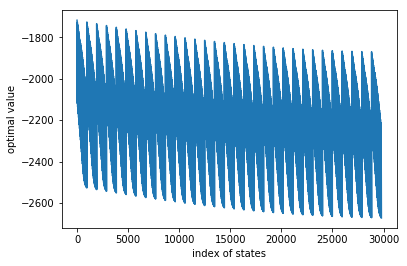

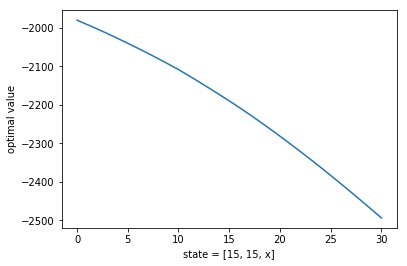

Optimal value at t=0:  [-1718.32630101 -1730.55759516 -1742.24064598 ..., -2635.66194068
 -2653.82383406 -2671.82015741]


In [19]:
plt.figure()
plt.plot(V)
plt.xlabel("index of states")
plt.ylabel("optimal value")
plt.show()

plt.figure()
plt.plot(V.reshape(S_max+1, S_max+1, S_max+1)[15, 15, :])
plt.xlabel("state = [15, 15, x]")
plt.ylabel("optimal value")
plt.show()

print('Optimal value at t=0: ', V)

## part (b)

In [21]:
V = np.zeros(num_states)
iter_count = 0
max_iter = 500

while True:
    iter_count += 1
    V_prev = V.copy()
    for current_state_idx in range(num_states):
        current_state_list = idx2list(current_state_idx)
        possible_value = [0, 0]
        for action_idx in [0, 1]:
            a = available_action(current_state_list)[action_idx]
            next_state_idx = generate_index_list(current_state_list, a)
            possible_value[action_idx] = gamma*V_prev[next_state_idx].mean() + reward(current_state_list, a)
        V[current_state_idx] = max(possible_value)
    if iter_count % 10 == 0:
        print(iter_count, np.linalg.norm(V-V_prev))
    if np.linalg.norm(V-V_prev) < 1e-6:
        break
    if iter_count == max_iter:
        break

10 12750.1196596
20 6826.64342376
30 4087.4345866
40 2447.29826121
50 1465.28787079
60 877.321974859
70 525.285073954
80 314.507577407
90 188.307304264
100 112.746538991
110 67.5055176652
120 40.4180470286
130 24.1997777679
140 14.489300871
150 8.6752796552
160 5.19421038779
170 3.10996562934
180 1.86205130205
190 1.11487889729
200 0.667519178585
210 0.399668389872
220 0.239296228474
230 0.143275491398
240 0.0857843291861
250 0.0513622466856
260 0.0307524743862
270 0.0184126424002
280 0.0110243291437
290 0.00660067308794
300 0.0039520668025
310 0.00236624836762
320 0.00141676031422
330 0.000848266731555
340 0.000507888636634
350 0.000304091687398
360 0.000182070911258
370 0.000109012586352
380 6.5269870971e-05
390 3.90794682268e-05
400 2.33983300384e-05
410 1.40094484441e-05
420 8.38795428357e-06
430 5.02218528828e-06
440 3.00697521278e-06
450 1.80038933151e-06
460 1.07795558761e-06


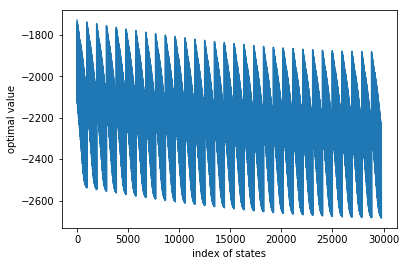

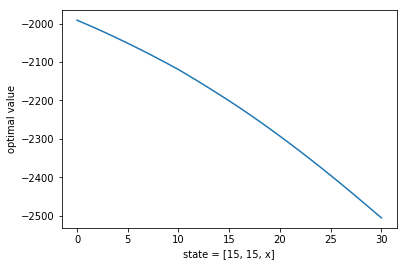

Optimal value:  [-1730.11695462 -1742.34824877 -1754.03129959 ..., -2647.45259428
 -2665.61448766 -2683.61081101]


In [22]:
plt.figure()
plt.plot(V)
plt.xlabel("index of states")
plt.ylabel("optimal value")
plt.show()

plt.figure()
plt.plot(V.reshape(S_max+1, S_max+1, S_max+1)[15, 15, :])
plt.xlabel("state = [15, 15, x]")
plt.ylabel("optimal value")
plt.show()

print('Optimal value: ', V)

## part (c)

In [23]:
V = np.zeros(num_states)
policy = np.zeros(num_states)
iter_count = 0
max_iter = 500

while True:
    iter_count += 1
    # Value update
    V_prev = V.copy()
    for current_state_idx in range(num_states):
        current_state_list = idx2list(current_state_idx)
        a_idx = policy[current_state_idx]
        a = available_action(current_state_list)[int(a_idx)]
        next_state_idx = generate_index_list(current_state_list, a)
        next_value = gamma*V_prev[next_state_idx].mean() + reward(current_state_list, a)
        V[current_state_idx] = next_value
        
    # Policy update
    for current_state_idx in range(num_states):
        current_state_list = idx2list(current_state_idx)
        possible_value = [0, 0]
        for action_idx in [0, 1]:
            a = available_action(current_state_list)[action_idx]
            next_state_idx = generate_index_list(current_state_list, a)
            possible_value[action_idx] = gamma*V[next_state_idx].mean() + reward(current_state_list, a)
        policy[current_state_idx] = np.argmax(possible_value)
    
    if iter_count % 10 == 0:
        print(iter_count, np.linalg.norm(V-V_prev))
    if np.linalg.norm(V-V_prev) < 1e-6*np.sqrt(num_states):
        break
    if iter_count == max_iter:
        break

10 12750.1196596
20 6826.64342376
30 4087.4345866
40 2447.29826121
50 1465.28787079
60 877.321974859
70 525.285073954
80 314.507577407
90 188.307304264
100 112.746538991
110 67.5055176652
120 40.4180470286
130 24.1997777679
140 14.489300871
150 8.6752796552
160 5.19421038779
170 3.10996562934
180 1.86205130205
190 1.11487889729
200 0.667519178585
210 0.399668389872
220 0.239296228474
230 0.143275491398
240 0.0857843291861
250 0.0513622466856
260 0.0307524743862
270 0.0184126424002
280 0.0110243291437
290 0.00660067308794
300 0.0039520668025
310 0.00236624836762
320 0.00141676031422
330 0.000848266731555
340 0.000507888636634
350 0.000304091687398
360 0.000182070911258


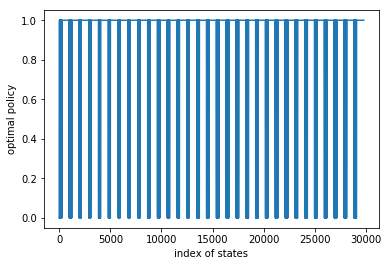

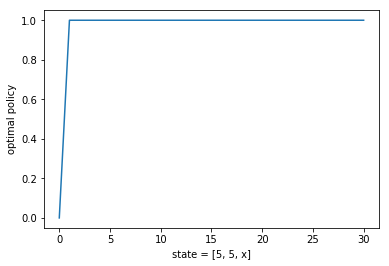

In [24]:
plt.figure()
plt.plot(policy)
plt.xlabel("index of states")
plt.ylabel("optimal policy")
plt.show()

plt.figure()
plt.plot(policy.reshape(S_max+1, S_max+1, S_max+1)[5, 5, :])
plt.xlabel("state = [5, 5, x]")
plt.ylabel("optimal policy")
plt.show()
